<a href="https://colab.research.google.com/github/aarohishaiva/Singapore_Resale_project5/blob/main/Project_5_Singapore_Resale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
import pandas as pd

# Load individual DataFrames
df1 = pd.read_csv("/content/drive/MyDrive/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2 = pd.read_csv("/content/drive/MyDrive/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")
df3 = pd.read_csv("/content/drive/MyDrive/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014 (1).csv")
df4 = pd.read_csv("/content/drive/MyDrive/ResaleflatpricesbasedonregistrationdatefromJan2017onwards (2).csv")
df5 = pd.read_csv("/content/drive/MyDrive/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

# Combine DataFrames
house = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


In [39]:
house


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
824448,2024-06,YISHUN,EXECUTIVE,360,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,810000.0,63 years 02 months
824449,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years
824450,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months
824451,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62 years 08 months


In [40]:
# checking dataset shape
house.shape

(824453, 11)

In [41]:
# checking the datatypes
house.dtypes

,0
month,object
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64


In [42]:
# checking the null values in dataset
house.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [43]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824453 entries, 0 to 824452
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                824453 non-null  object 
 1   town                 824453 non-null  object 
 2   flat_type            824453 non-null  object 
 3   block                824453 non-null  object 
 4   street_name          824453 non-null  object 
 5   storey_range         824453 non-null  object 
 6   floor_area_sqm       824453 non-null  float64
 7   flat_model           824453 non-null  object 
 8   lease_commence_date  824453 non-null  int64  
 9   resale_price         824453 non-null  float64
 10  remaining_lease      402599 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 69.2+ MB


In [44]:
#descriptive statistics analaysis

house.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,824453.0,96.823438,24.813796,28.0,74.0,95.0,113.0,297.0
lease_commence_date,824453.0,1991.780190,12.309275,1966.0,1984.0,1989.0,2000.0,2020.0
resale_price,824453.0,396097.682525,177873.558053,28000.0,266000.0,370000.0,492000.0,1588000.0


In [45]:
# checking the unique values in flat_type feature
house['flat_type'].value_counts()

,count
flat_type,
4 ROOM,331675
3 ROOM,226572
5 ROOM,193057
EXECUTIVE,61223
2 ROOM,11037
1 ROOM,545
MULTI-GENERATION,344


In [46]:
# checking the unique values in town feature
house['town'].value_counts()

,count
town,
WOODLANDS,68908
TAMPINES,61674
JURONG WEST,59687
YISHUN,54933
BEDOK,49288
SENGKANG,47582
HOUGANG,44177
ANG MO KIO,39225
CHOA CHU KANG,38124


In [47]:
house['storey_range'].value_counts()

,count
storey_range,
04 TO 06,199625
07 TO 09,179527
01 TO 03,157938
10 TO 12,154841
13 TO 15,66019
16 TO 18,28089
19 TO 21,12410
22 TO 24,8255
25 TO 27,4430


In [48]:
house['flat_model'].value_counts()

,count
flat_model,
Model A,259164
Improved,213652
New Generation,133005
Premium Apartment,67598
Simplified,41360
Apartment,32438
Standard,30205
Maisonette,22688
Model A2,12252


In [49]:
house.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [50]:
# Convert the 'month' column to a datetime format
house['month'] = pd.to_datetime(house['month'])

# Extract the year and month into separate columns
house['year'] = house['month'].dt.year
house['month_of_year'] = house['month'].dt.month
house

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year
0,2000-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN,2000,1
1,2000-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN,2000,1
2,2000-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN,2000,1
3,2000-01-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN,2000,1
4,2000-01-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824448,2024-06-01,YISHUN,EXECUTIVE,360,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,810000.0,63 years 02 months,2024,6
824449,2024-06-01,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years,2024,6
824450,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6
824451,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6


In [51]:
house.dtypes

,0
month,datetime64[ns]
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64


In [52]:
house['lease_commence_year'] = pd.to_datetime(house['lease_commence_date'],format = '%Y').dt.year
# Extract the year of lease commencement
#house['lease_commence_year'] = house['lease_commence_date'].dt.year

In [53]:
house

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year,lease_commence_year
0,2000-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN,2000,1,1986
1,2000-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN,2000,1,1986
2,2000-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN,2000,1,1976
3,2000-01-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN,2000,1,1976
4,2000-01-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN,2000,1,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824448,2024-06-01,YISHUN,EXECUTIVE,360,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,810000.0,63 years 02 months,2024,6,1988
824449,2024-06-01,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years,2024,6,1986
824450,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6,1988
824451,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6,1988


In [54]:
house.dtypes

,0
month,datetime64[ns]
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64


In [56]:
# Extract the remaining_lease feature

data = house['remaining_lease']
house_new = pd.DataFrame(data)

# Extract years and months using regular expressions
lease_info = house['remaining_lease'].str.extract(r'(\d+) years (\d+) months')
lease_info.columns = ['years', 'months']

# Convert to numeric values
house['remaining_lease_years'] = pd.to_numeric(lease_info['years'])
house['remaining_lease_months'] = pd.to_numeric(lease_info['months'])

In [57]:
house_new_data = house.copy()

In [58]:
house_new_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,2000-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN,2000,1,1986,NaN,NaN
1,2000-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN,2000,1,1986,NaN,NaN
2,2000-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN,2000,1,1976,NaN,NaN
3,2000-01-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN,2000,1,1976,NaN,NaN
4,2000-01-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN,2000,1,1976,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824448,2024-06-01,YISHUN,EXECUTIVE,360,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,810000.0,63 years 02 months,2024,6,1988,63.0,2.0
824449,2024-06-01,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years,2024,6,1986,NaN,NaN
824450,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6,1988,62.0,8.0
824451,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6,1988,62.0,8.0


In [59]:
house_new_data.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [60]:
# handleing the null values using mean method
house_new_data['remaining_lease_years'].fillna(house['remaining_lease_years'].mean(),inplace = True)
house_new_data['remaining_lease_months'].fillna(house['remaining_lease_months'].mean(),inplace = True)
house_new_data.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [61]:
#  dropping the existing features

house_new_data.drop(columns=['month','lease_commence_date','remaining_lease'],inplace = True)

In [62]:
house_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,147000.0,2000,1,1986,74.019356,6.533468
1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,144000.0,2000,1,1986,74.019356,6.533468
2,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,159000.0,2000,1,1976,74.019356,6.533468
3,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,167000.0,2000,1,1976,74.019356,6.533468
4,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,163000.0,2000,1,1976,74.019356,6.533468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824448,YISHUN,EXECUTIVE,360,YISHUN RING RD,07 TO 09,142.0,Apartment,810000.0,2024,6,1988,63.000000,2.000000
824449,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,790000.0,2024,6,1986,74.019356,6.533468
824450,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1000000.0,2024,6,1988,62.000000,8.000000
824451,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1000000.0,2024,6,1988,62.000000,8.000000


DATA PREPROCESSING

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encoder = LabelEncoder()
house_new_data['town'] = encoder.fit_transform(house_new_data['town'])
house_new_data['flat_type'] = encoder.fit_transform(house_new_data['flat_type'])
house_new_data['storey_range'] = encoder.fit_transform(house_new_data['storey_range'])
house_new_data['flat_model'] = encoder.fit_transform(house_new_data['flat_model'])

In [65]:
house_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,170,ANG MO KIO AVE 4,4,69.0,5,147000.0,2000,1,1986,74.019356,6.533468
1,0,2,174,ANG MO KIO AVE 4,2,61.0,5,144000.0,2000,1,1986,74.019356,6.533468
2,0,2,216,ANG MO KIO AVE 1,4,73.0,12,159000.0,2000,1,1976,74.019356,6.533468
3,0,2,215,ANG MO KIO AVE 1,4,73.0,12,167000.0,2000,1,1976,74.019356,6.533468
4,0,2,218,ANG MO KIO AVE 1,4,67.0,12,163000.0,2000,1,1976,74.019356,6.533468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824448,25,5,360,YISHUN RING RD,4,142.0,3,810000.0,2024,6,1988,63.000000,2.000000
824449,25,5,723,YISHUN ST 71,5,146.0,7,790000.0,2024,6,1986,74.019356,6.533468
824450,25,5,826,YISHUN ST 81,5,146.0,7,1000000.0,2024,6,1988,62.000000,8.000000
824451,25,5,826,YISHUN ST 81,2,146.0,7,1000000.0,2024,6,1988,62.000000,8.000000


In [66]:
# after encoding descriptive statistics analaysis

house_new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
town,824453.0,13.679368,8.141824,0.0,7.000000,13.000000,22.000000,25.0
flat_type,824453.0,3.080361,0.928876,0.0,2.000000,3.000000,4.000000,6.0
storey_range,824453.0,3.628694,2.901184,0.0,2.000000,4.000000,5.000000,24.0
floor_area_sqm,824453.0,96.823438,24.813796,28.0,74.000000,95.000000,113.000000,297.0
flat_model,824453.0,8.796232,3.748846,0.0,5.000000,8.000000,12.000000,20.0
resale_price,824453.0,396097.682525,177873.558053,28000.0,266000.000000,370000.000000,492000.000000,1588000.0
year,824453.0,2012.949787,7.724732,2000.0,2006.000000,2014.000000,2020.000000,2024.0
month_of_year,824453.0,6.511008,3.401686,1.0,4.000000,7.000000,9.000000,12.0
lease_commence_year,824453.0,1991.780190,12.309275,1966.0,1984.000000,1989.000000,2000.000000,2020.0
remaining_lease_years,824453.0,74.019356,8.487439,41.0,74.019356,74.019356,74.019356,97.0


Skewness Handling

In [67]:
# checking the outliars using boxplot distribution plot

def plot(house_new_data,column):
    plt.figure(figsize =(15,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = house_new_data ,x = column)
    plt.title(f'box plot for {column}')


    plt.subplot(1,3,2)
    sns.histplot(data = house_new_data ,x = column,kde = True ,bins = 40)
    plt.title(f'distribution  plot for {column}')
    plt.show()



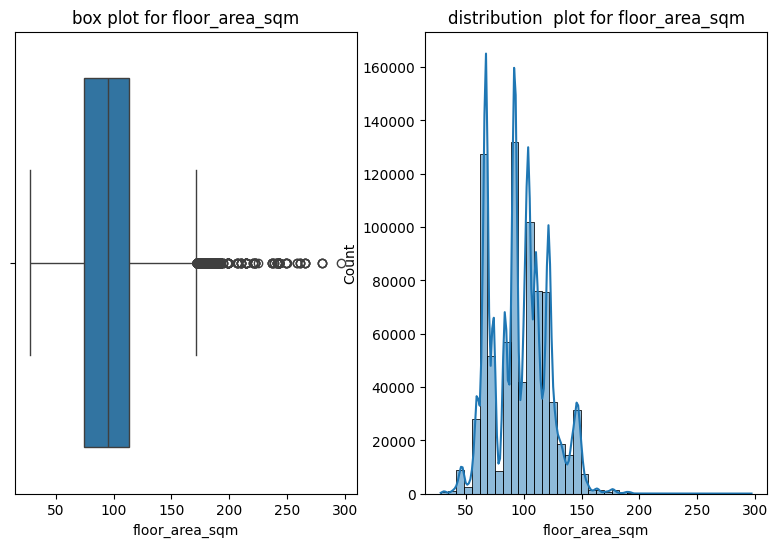

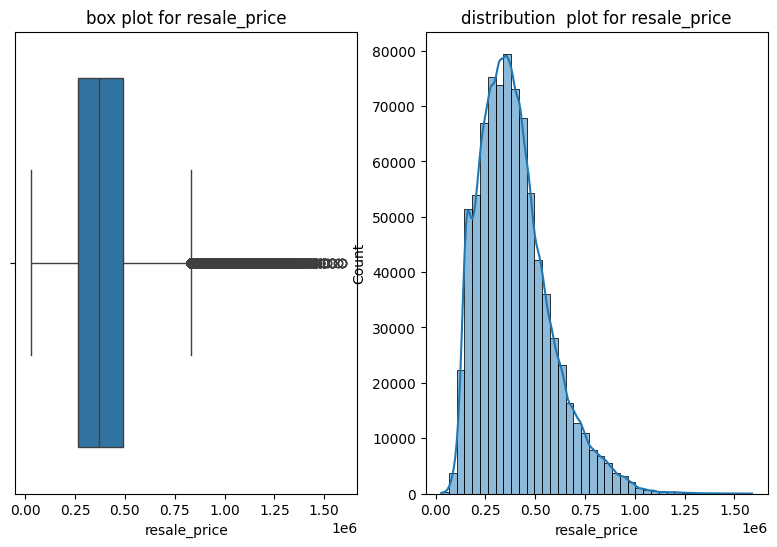

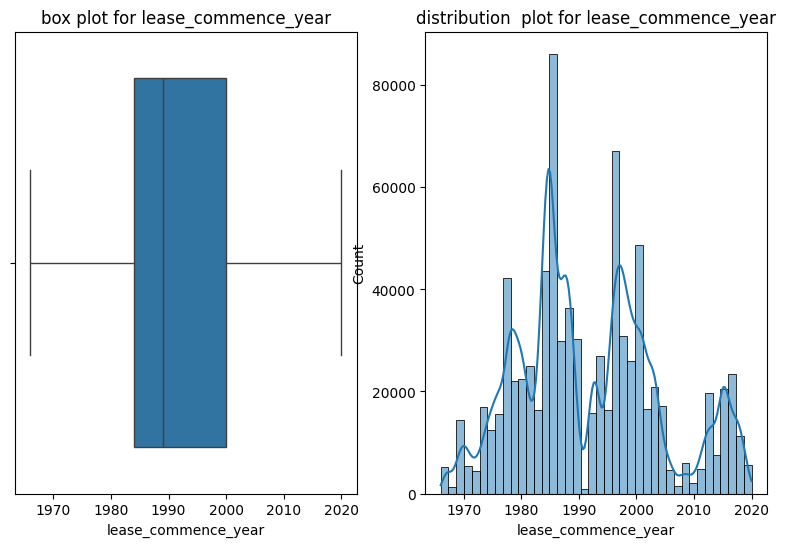

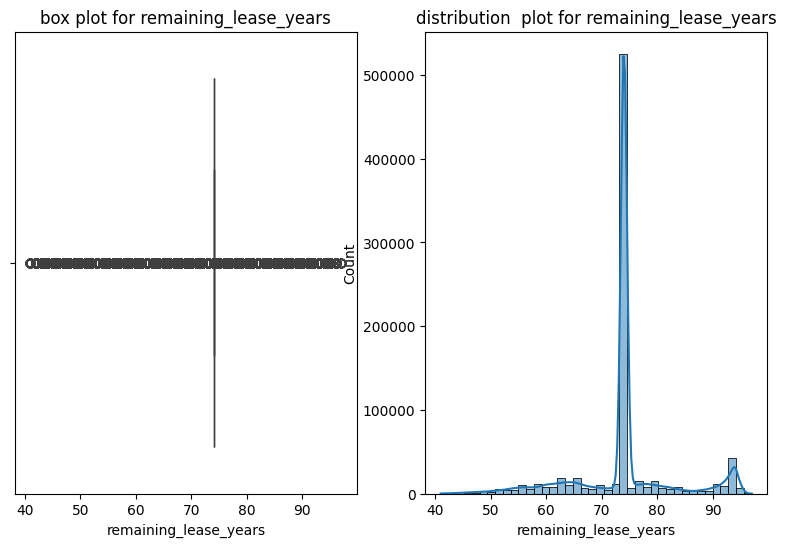

In [68]:
for i in ['floor_area_sqm','resale_price','lease_commence_year','remaining_lease_years']:
    plot(house_new_data ,i)

In [69]:
# 'floor_area_sqm','resale_price' this two feature are skewd in data handling log method


house_new_data['floor_area_sqm'] = np.log(house_new_data['floor_area_sqm'])
house_new_data['resale_price'] = np.log(house_new_data['resale_price'])
house_new_data


,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,170,ANG MO KIO AVE 4,4,4.234107,5,11.898188,2000,1,1986,74.019356,6.533468
1,0,2,174,ANG MO KIO AVE 4,2,4.110874,5,11.877569,2000,1,1986,74.019356,6.533468
2,0,2,216,ANG MO KIO AVE 1,4,4.290459,12,11.976659,2000,1,1976,74.019356,6.533468
3,0,2,215,ANG MO KIO AVE 1,4,4.290459,12,12.025749,2000,1,1976,74.019356,6.533468
4,0,2,218,ANG MO KIO AVE 1,4,4.204693,12,12.001505,2000,1,1976,74.019356,6.533468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824448,25,5,360,YISHUN RING RD,4,4.955827,3,13.604790,2024,6,1988,63.000000,2.000000
824449,25,5,723,YISHUN ST 71,5,4.983607,7,13.579788,2024,6,1986,74.019356,6.533468
824450,25,5,826,YISHUN ST 81,5,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000
824451,25,5,826,YISHUN ST 81,2,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000


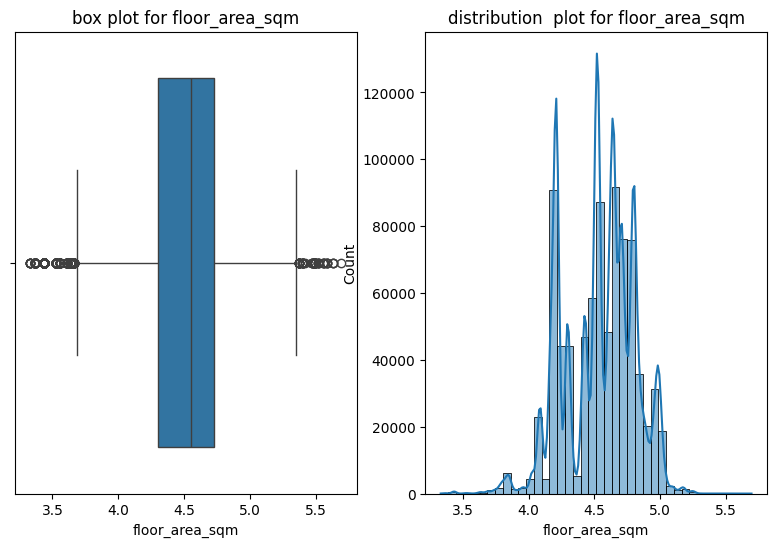

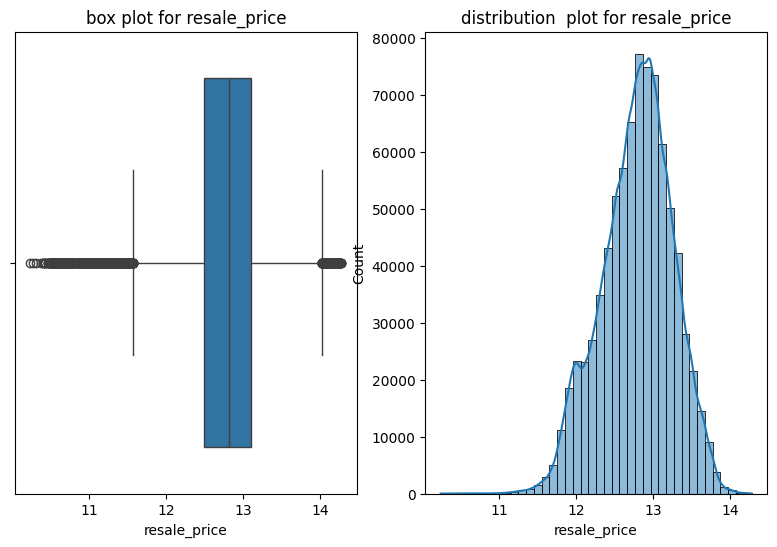

In [70]:
for i in ['floor_area_sqm','resale_price']:
    plot(house_new_data,i)

Treat Outliers using IQR

In [71]:
#using the IQR & Clips  method removing the outliars :
# formula IQR = Q3_Q1
def outlier(house_new_data ,column):
    IQR = house_new_data[column].quantile(0.75)-house_new_data[column].quantile(0.25)
    upper_value = house_new_data[column].quantile(0.75)+1.5*IQR
    lower_value = house_new_data[column].quantile(0.25)-1.5*IQR

    house_new_data[column] =     house_new_data[column].clip(upper_value,lower_value)

outlier(house_new_data, 'floor_area_sqm')
outlier(house_new_data, 'resale_price')
house_new_data1 = house_new_data.copy()

In [72]:
house_new_data1

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,170,ANG MO KIO AVE 4,4,4.234107,5,11.898188,2000,1,1986,74.019356,6.533468
1,0,2,174,ANG MO KIO AVE 4,2,4.110874,5,11.877569,2000,1,1986,74.019356,6.533468
2,0,2,216,ANG MO KIO AVE 1,4,4.290459,12,11.976659,2000,1,1976,74.019356,6.533468
3,0,2,215,ANG MO KIO AVE 1,4,4.290459,12,12.025749,2000,1,1976,74.019356,6.533468
4,0,2,218,ANG MO KIO AVE 1,4,4.204693,12,12.001505,2000,1,1976,74.019356,6.533468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824448,25,5,360,YISHUN RING RD,4,4.955827,3,13.604790,2024,6,1988,63.000000,2.000000
824449,25,5,723,YISHUN ST 71,5,4.983607,7,13.579788,2024,6,1986,74.019356,6.533468
824450,25,5,826,YISHUN ST 81,5,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000
824451,25,5,826,YISHUN ST 81,2,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000


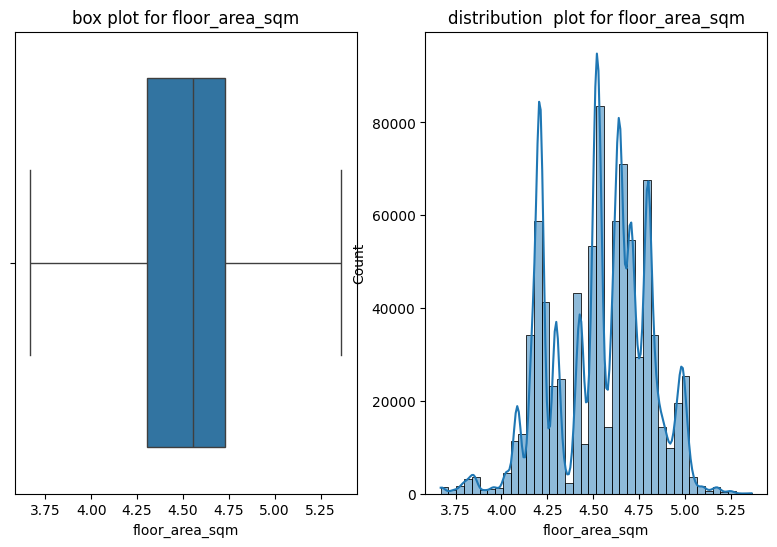

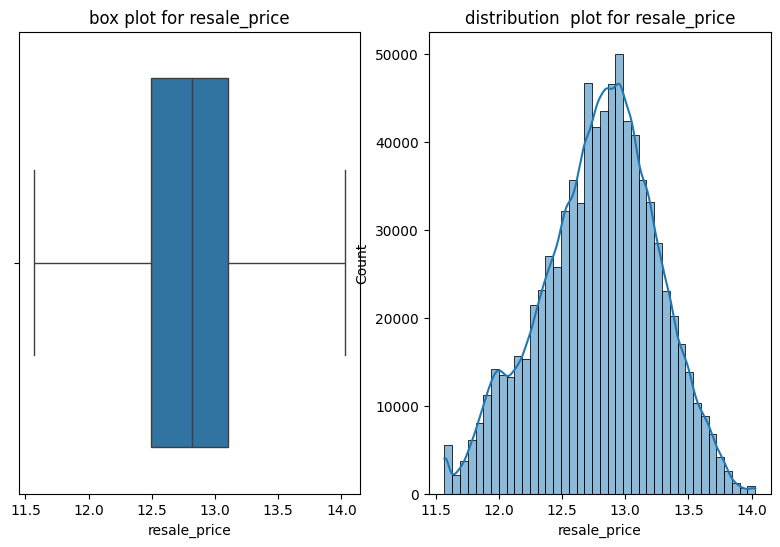

In [73]:
# after IQR using checking the skewness
for i in ['floor_area_sqm','resale_price']:
    plot(house_new_data1,i)

<Axes: xlabel='resale_price', ylabel='flat_model'>

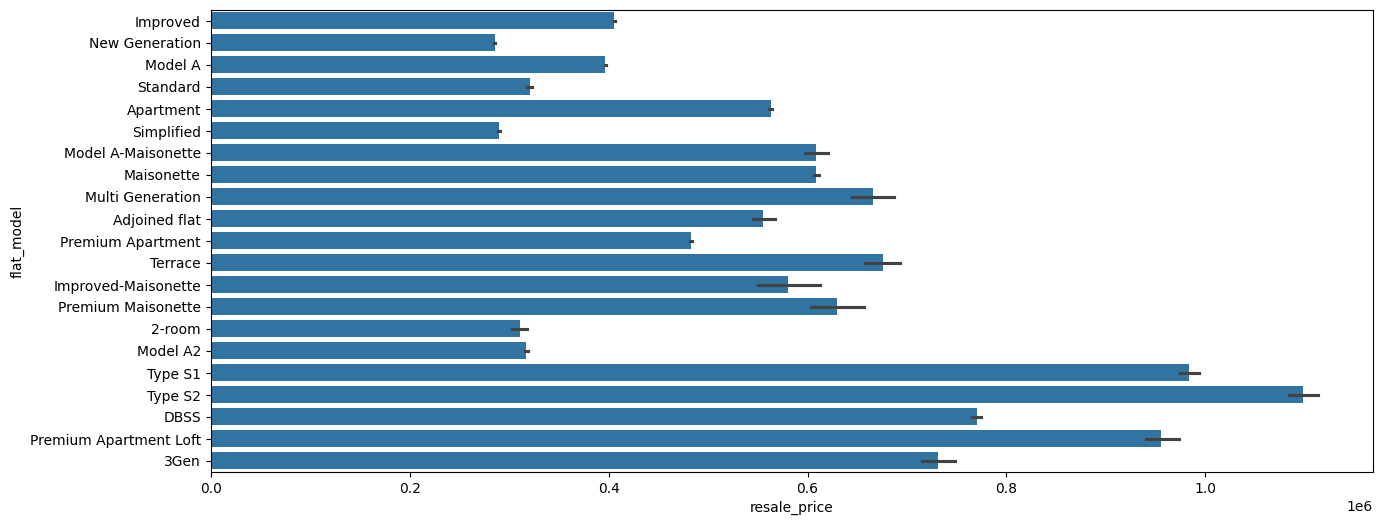

In [74]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_model', x= 'resale_price',data = house )

<Axes: xlabel='resale_price', ylabel='town'>

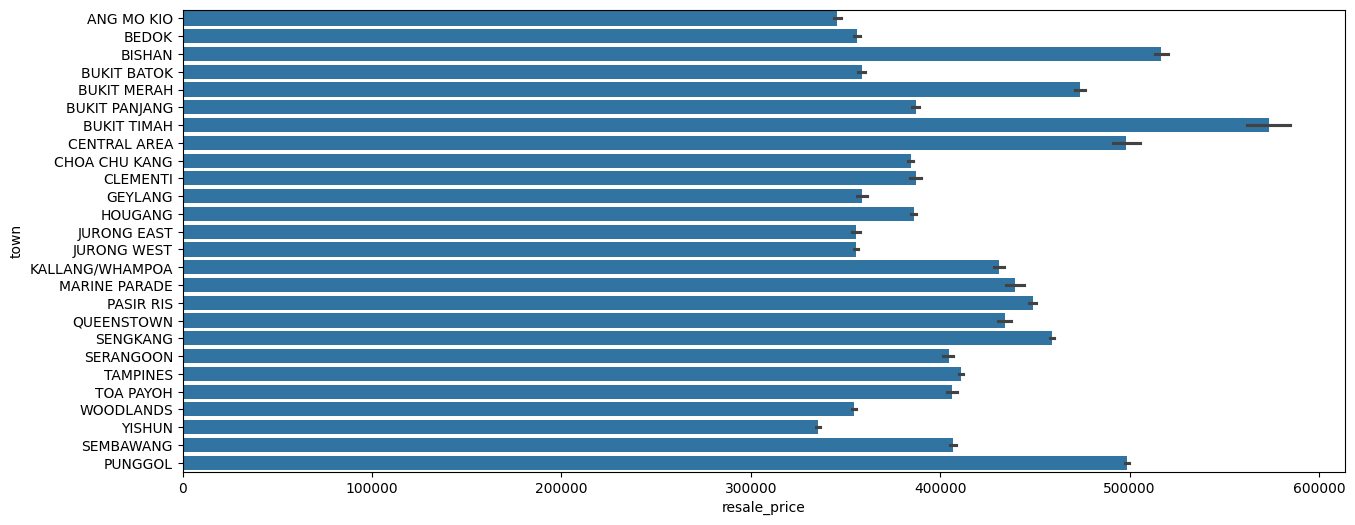

In [75]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'town', x= 'resale_price',data = house )

Basic EDA

<Axes: xlabel='resale_price', ylabel='flat_type'>

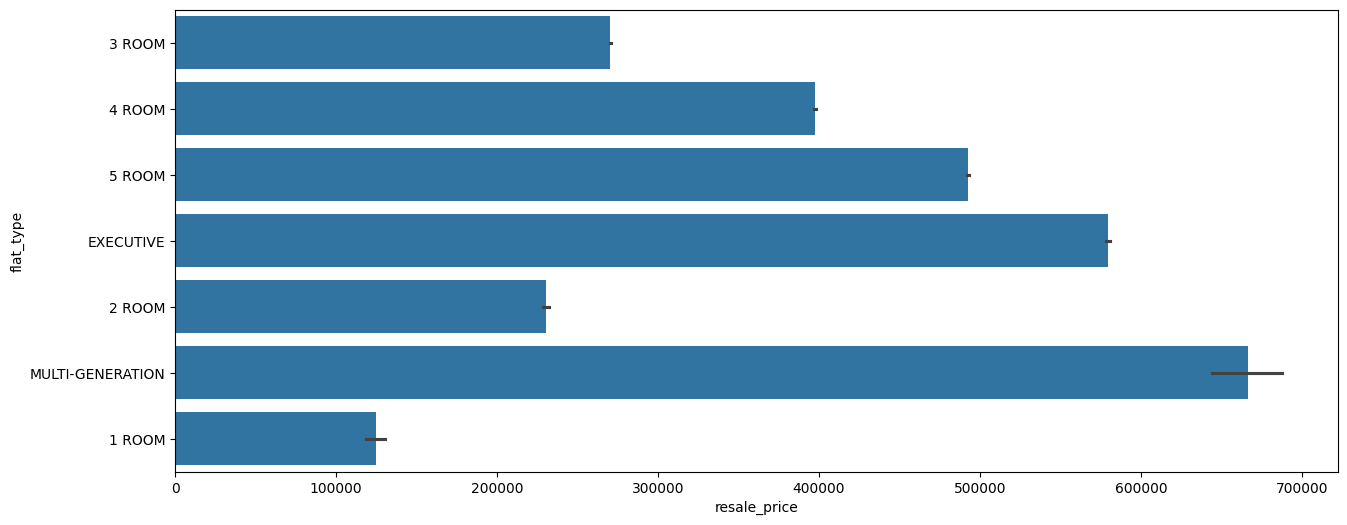

In [76]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_type', x= 'resale_price',data = house )

<Axes: xlabel='resale_price', ylabel='floor_area_sqm'>

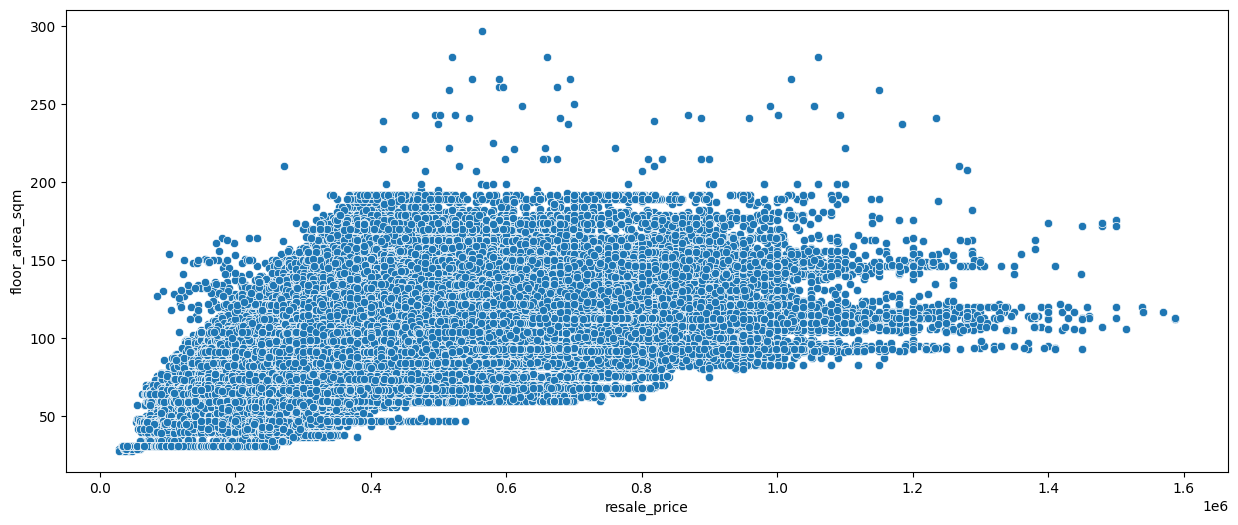

In [77]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'resale_price' ,y = 'floor_area_sqm',data = house)

<Axes: xlabel='lease_commence_year', ylabel='resale_price'>

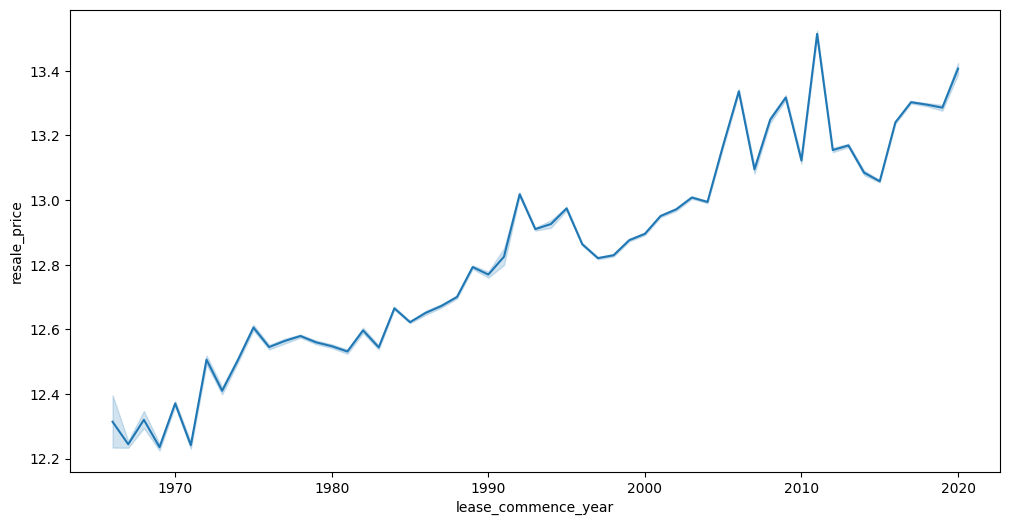

In [78]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'lease_commence_year' , y = 'resale_price', data = house_new_data)

<Axes: xlabel='year', ylabel='resale_price'>

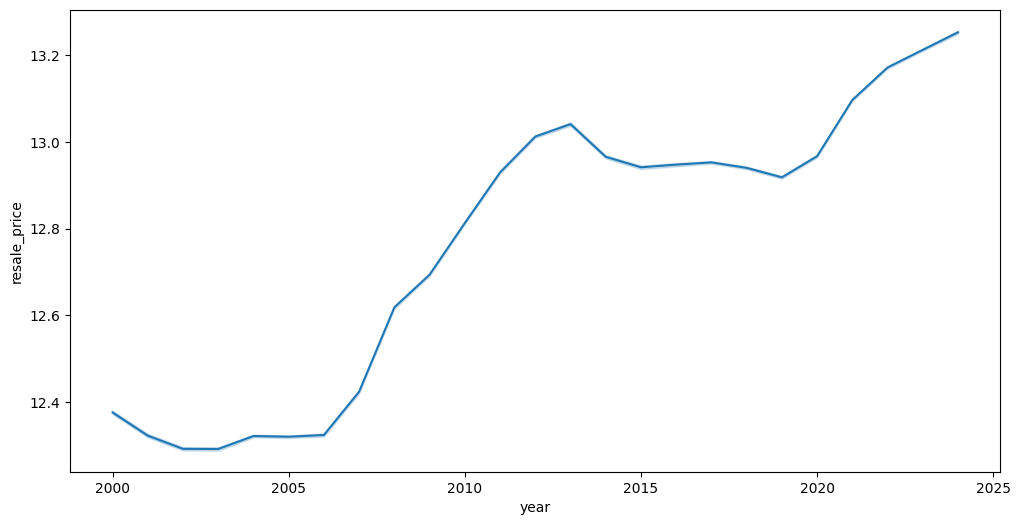

In [79]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'year', y = 'resale_price', data = house_new_data)

<Axes: xlabel='remaining_lease_years', ylabel='resale_price'>

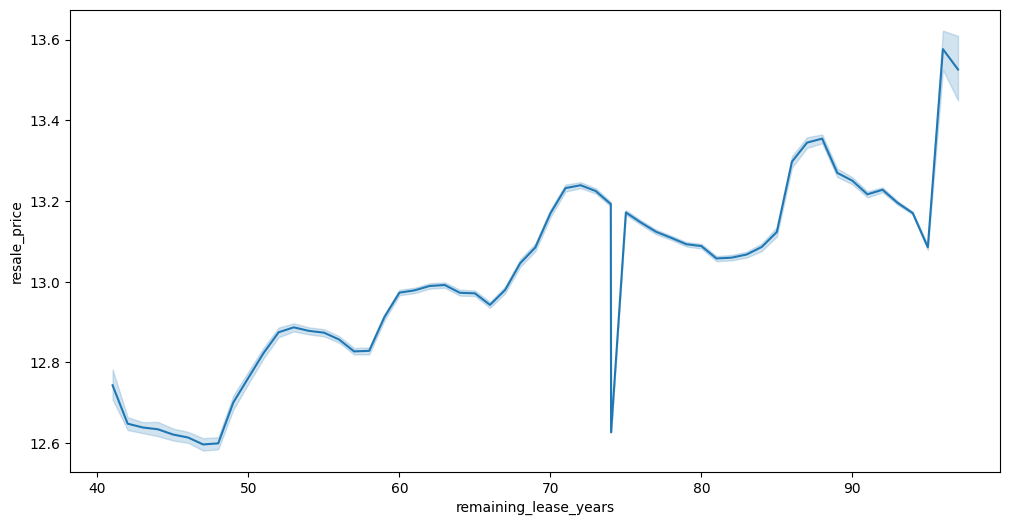

In [80]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'remaining_lease_years' , y = 'resale_price', data = house_new_data)

In [81]:
# dropping the irrelvent feature
house_new_data1.drop(columns=['block','street_name'],inplace = True)
house_new_data1

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,4,4.234107,5,11.898188,2000,1,1986,74.019356,6.533468
1,0,2,2,4.110874,5,11.877569,2000,1,1986,74.019356,6.533468
2,0,2,4,4.290459,12,11.976659,2000,1,1976,74.019356,6.533468
3,0,2,4,4.290459,12,12.025749,2000,1,1976,74.019356,6.533468
4,0,2,4,4.204693,12,12.001505,2000,1,1976,74.019356,6.533468
...,...,...,...,...,...,...,...,...,...,...,...
824448,25,5,4,4.955827,3,13.604790,2024,6,1988,63.000000,2.000000
824449,25,5,5,4.983607,7,13.579788,2024,6,1986,74.019356,6.533468
824450,25,5,5,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000
824451,25,5,2,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000


In [82]:
house_new_data1

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,4,4.234107,5,11.898188,2000,1,1986,74.019356,6.533468
1,0,2,2,4.110874,5,11.877569,2000,1,1986,74.019356,6.533468
2,0,2,4,4.290459,12,11.976659,2000,1,1976,74.019356,6.533468
3,0,2,4,4.290459,12,12.025749,2000,1,1976,74.019356,6.533468
4,0,2,4,4.204693,12,12.001505,2000,1,1976,74.019356,6.533468
...,...,...,...,...,...,...,...,...,...,...,...
824448,25,5,4,4.955827,3,13.604790,2024,6,1988,63.000000,2.000000
824449,25,5,5,4.983607,7,13.579788,2024,6,1986,74.019356,6.533468
824450,25,5,5,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000
824451,25,5,2,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000


In [83]:
house_new_data1.dtypes

,0
town,int64
flat_type,int64
storey_range,int64
floor_area_sqm,float64
flat_model,int64
resale_price,float64
year,int32
month_of_year,int32
lease_commence_year,int32
remaining_lease_years,float64


In [84]:
heat = house_new_data1.corr()
heat

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
town,1.000000,0.130710,-0.048838,0.129430,-0.105157,0.034178,0.033864,0.003196,0.213175,0.126793,0.002588
flat_type,0.130710,1.000000,0.070405,0.940646,-0.366368,0.568189,0.049847,0.005740,0.335768,0.111845,-0.001151
storey_range,-0.048838,0.070405,1.000000,0.042012,-0.070539,0.266395,0.109651,-0.001266,0.235999,0.184345,-0.000877
floor_area_sqm,0.129430,0.940646,0.042012,1.000000,-0.373236,0.552273,0.015820,0.003964,0.330053,0.094514,-0.002116
flat_model,-0.105157,-0.366368,-0.070539,-0.373236,1.000000,-0.242922,-0.032254,-0.003120,-0.177933,-0.073480,0.001175
resale_price,0.034178,0.568189,0.266395,0.552273,-0.242922,1.000000,0.683548,-0.002395,0.492639,0.160371,0.002383
year,0.033864,0.049847,0.109651,0.015820,-0.032254,0.683548,1.000000,-0.032875,0.323284,-0.003255,0.001186
month_of_year,0.003196,0.005740,-0.001266,0.003964,-0.003120,-0.002395,-0.032875,1.000000,0.002492,-0.005029,0.011245
lease_commence_year,0.213175,0.335768,0.235999,0.330053,-0.177933,0.492639,0.323284,0.002492,1.000000,0.685496,0.012107
remaining_lease_years,0.126793,0.111845,0.184345,0.094514,-0.073480,0.160371,-0.003255,-0.005029,0.685496,1.000000,-0.001572


<Axes: >

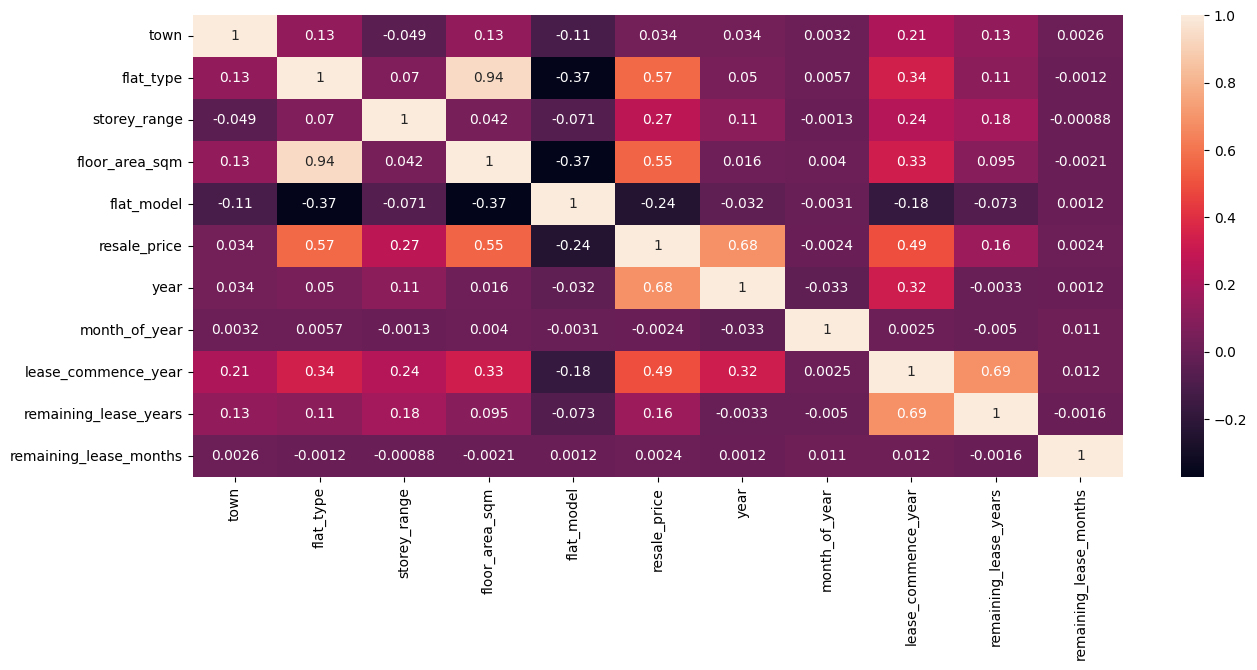

In [85]:
# Need to verify any columns are highly correlated using Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(heat,annot = True)

Model Buliding:

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [87]:
house_new_data1.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'year', 'month_of_year', 'lease_commence_year',
       'remaining_lease_years', 'remaining_lease_months'],
      dtype='object')

In [88]:
x = house_new_data1[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
        'year', 'month_of_year', 'lease_commence_year',
       'remaining_lease_years', 'remaining_lease_months']]
y = house_new_data1[['resale_price']]

In [89]:
#standardize the features of a dataset
encoder = StandardScaler()

encoder.fit_transform(x)

array([[-1.68013655e+00, -1.16308524e+00,  1.27984248e-01, ...,
        -4.69580344e-01, -3.34868096e-15,  2.02057239e-15],
       [-1.68013655e+00, -1.16308524e+00, -5.61389973e-01, ...,
        -4.69580344e-01, -3.34868096e-15,  2.02057239e-15],
       [-1.68013655e+00, -1.16308524e+00,  1.27984248e-01, ...,
        -1.28197638e+00, -3.34868096e-15,  2.02057239e-15],
       ...,
       [ 1.39043028e+00,  2.06662705e+00,  4.72671358e-01, ...,
        -3.07101137e-01, -1.41613545e+00,  8.34076165e-01],
       [ 1.39043028e+00,  2.06662705e+00, -5.61389973e-01, ...,
        -3.07101137e-01, -1.41613545e+00,  8.34076165e-01],
       [ 1.39043028e+00,  3.14319781e+00,  1.27984248e-01, ...,
        -3.88340740e-01, -1.41613545e+00,  2.65335598e-01]])

In [90]:
#check the accuracy of training and testing using metrics RandomForestRegressor


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

RFR= RandomForestRegressor(n_estimators= 50 ,random_state = 0)

# fitting the model:

RFR.fit(x_train,y_train)

y_pred_train = RFR.predict(x_train)
y_pred_test = RFR.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9961873573004544, 0.9818373267594437)

In [91]:
# GridsearchCV is a cross validation function
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

param = {'max_depth'        : [20],
              'min_samples_split': [ 5, ],
              'min_samples_leaf' : [ 2, ],
              'max_features'     : ['log2']}
grid_searchcv = GridSearchCV(RandomForestRegressor(),param_grid = param,  cv = 5)
grid_searchcv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20], 'max_features': ['log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5]})

In [92]:
grid_searchcv.best_score_

0.9671322874589314

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model:

Hyper_model.fit(x_train,y_train)

y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9750427920664211, 0.9679638850438972)

In [94]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model:

Hyper_model.fit(x_train,y_train)

y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.006712769506058433
Mean Absolute Error: 0.05978889656549201
Root Mean Squared Error: 0.08193149276107713
0.9680858815678449


In [95]:
# manually passed the user input and predict the selling price

user_data = np.array([[0,1,3,3.785069,5,2017,1,1979,61.000000,4.000000]])
y_prediction = Hyper_model.predict(user_data)
y_prediction[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


12.358603835807564

In [96]:
user_data = np.array([[4,3,2,4.785069,4,2023,3,1989,69.000000,4.000000]])

y_prediction = Hyper_model.predict(user_data)
y_prediction[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


13.410572930952096

In [97]:
# using Inverse Log Transformation to convert the value to original re sale price of the data (exp)
np.exp(y_prediction[0])

667018.4134924024

In [99]:
import pickle

# Assuming `Hyper_model` is your trained regression model
with open("/content/drive/MyDrive/house_price_model.pkl", 'wb') as f:
    pickle.dump(Hyper_model, f)


In [101]:
import pickle
import numpy as np

# Correct the file extension if needed (e.g., .pkl instead of .pk1)
model_path = "/content/drive/MyDrive/house_price_model.pkl"

# Load the model
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Example user data (ensure it matches the model's expected input shape)
user_data = np.array([[4, 3, 2, 4.785069, 4, 2023, 3, 1989, 69.000000, 4.000000]])

# Make a prediction
prediction = model.predict(user_data)

# Retrieve and transform the predicted price if needed
predicted_price = prediction[0]
final_price = np.exp(predicted_price)  # Only if the model was trained on log-transformed prices

final_price


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


667018.4134924024

In [102]:
# Install required packages
!pip install streamlit streamlit-option-menu geopy
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.4/823.4 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [107]:
%%writefile app.py

import streamlit as st
import pickle
import numpy as np

# Load the model
with open("/content/drive/MyDrive/house_price_model.pkl", 'rb') as f:
    model = pickle.load(f)

# Feature names
features = ['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
            'year', 'month_of_year', 'lease_commence_year',
            'remaining_lease_years', 'remaining_lease_months']

# Categorical variable mappings
categorical_mappings = {
    'town': {'SENGKANG': 20, 'PUNGGOL': 17, 'WOODLANDS': 24, 'YISHUN': 25,
             'TAMPINES': 22, 'JURONG WEST': 13, 'BEDOK': 1, 'HOUGANG': 11,
             'CHOA CHU KANG': 8, 'ANG MO KIO': 0, 'BUKIT MERAH': 4, 'BUKIT PANJANG': 5,
             'BUKIT BATOK': 3, 'TOA PAYOH': 23, 'PASIR RIS': 16, 'KALLANG/WHAMPOA': 14,
             'QUEENSTOWN': 18, 'SEMBAWANG': 19, 'GEYLANG': 10, 'CLEMENTI': 9,
             'JURONG EAST': 12, 'BISHAN': 2, 'SERANGOON': 21, 'CENTRAL AREA': 7,
             'MARINE PARADE': 15, 'BUKIT TIMAH': 6},

    'flat_type': {'4 ROOM': 3, '5 ROOM': 4, '3 ROOM': 2,
                  'EXECUTIVE': 5, '2 ROOM': 1, 'MULTI-GENERATION': 6,
                  '1 ROOM': 0},

    'storey_range': {'04 TO 06': 1, '07 TO 09': 2, '10 TO 12': 3, '01 TO 03': 0,
                     '13 TO 15': 4, '16 TO 18': 5, '19 TO 21': 6, '22 TO 24': 7,
                     '25 TO 27': 8, '28 TO 30': 9, '31 TO 33': 10, '34 TO 36': 11,
                     '37 TO 39': 12, '40 TO 42': 13, '43 TO 45': 14, '46 TO 48': 15,
                     '49 TO 51': 16},

    'flat_model': {'Model A': 8, 'Improved': 5, 'New Generation': 12, 'Premium Apartment': 13,
                   'Simplified': 16, 'Apartment': 3, 'Maisonette': 7, 'Standard': 17,
                   'DBSS': 4, 'Model A2': 10, 'Model A-Maisonette': 9, 'Adjoined flat': 2,
                   'Type S1': 19, 'Type S2': 20, 'Premium Apartment Loft': 14, 'Terrace': 18,
                   'Multi Generation': 11, '2-room': 0, 'Improved-Maisonette': 6, '3Gen': 1,
                   'Premium Maisonette': 15},
}

# Numerical variable ranges
numerical_ranges = {
    'floor_area_sqm': list(np.arange(30, 200, 5)),
    'year': list(range(2000, 2025)),
    'month_of_year': list(range(1, 13)),
    'lease_commence_year': list(range(1960, 2025)),
    'remaining_lease_years': list(range(1, 100)),
    'remaining_lease_months': list(range(0, 12))
}

# Input widgets for user interaction
st.title("House Price Prediction App")

input_data = {}
for feature in features:
    if feature in categorical_mappings:
        selected_option = st.sidebar.selectbox(f"Select {feature.capitalize()}:", options=list(categorical_mappings[feature].keys()))
        input_data[feature] = categorical_mappings[feature][selected_option]
    else:
        selected_option = st.sidebar.selectbox(f"Select {feature.capitalize()}:", options=numerical_ranges[feature])
        input_data[feature] = selected_option

# Make predictions using the loaded model
if st.sidebar.button("Predict"):
    input_array = np.array([input_data[feature] for feature in features]).reshape(1, -1)
    prediction = model.predict(input_array)

    # Display the prediction result
    prediction_scale = np.exp(prediction[0])
    st.subheader("Prediction Result:")
    st.write(f"The predicted house price is: {prediction_scale:,.2f} INR")


Overwriting app.py


In [108]:
# Import ngrok
from pyngrok import ngrok

# Authenticate ngrok with your token
ngrok.set_auth_token("2iT1S8jORWP8AFT2gipGnOs9RQe_325YotmHc3irE4pTUSuSp")

# Stop any existing ngrok processes. This is important to avoid conflicts with the free account limit.
ngrok.kill()

# Start ngrok to tunnel the Streamlit app
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")

# Run the Streamlit app
!streamlit run app.py &

Streamlit app is live at: NgrokTunnel: "https://85f4-35-196-193-83.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.193.83:8501

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
  Stopping...
